# Statistics

Statistics calculates numbers from data. 
With probability theory as backend, statistics interprets the computed statistics.
The latter "statistic" is a function of the data.

**Example** The sample of 100 accounts from [HK top 300 Youtubers](https://www.kaggle.com/datasets/patriotboy112/hks-top-300-youtubers) in the previous lecture.

In [2]:
load("logYoutuber_sample.Rdata")
n = nrow(d1.log.sub)

Point estimates

In [3]:
mu = mean(d1.log.sub[["count"]])
print(mu)

[1] 5.995003


In [4]:
sigma = sd(d1.log.sub[["count"]])
print(sigma^2)

[1] 2.598229


We are interested in the *sample mean* to learn the location of the center in the probability weighted average, or *population mean* $\mu = E[X_i]$.
We are also interested in the *sample variance* to learn the scale of spread of the sample, or *population variance* $\sigma^2 = var(X_i)$.

View the sample as a multinomial distribution with $n$ outcomes at the observed realized points. 
This is a sample sample, so each observation is equally important.
Assign equal probability $1/n$ on each point, and naturally the sample mean is $\hat{\mu} = \bar{X} = n^{-1} \sum_{i=1}^n X_i.$
Similarly, a widely used sample variance is computed as $s^2 = (n-1)^{-1} \sum_{i=1}^n (X_i - \hat{\mu})^2$.

#### Estimation methods

The familiar mean and variance are two examples. 
Suppose the data are generated from a parametric model, Statistical
estimation looks for the unknown parameter from the observed data. A
*principle* is an ideology about a proper way of estimation. Over the
history of statistics, only a few principles are widely accepted.
There are multiple ways to estimate parameters. 
Two most popular methods are the *method of moments* and the *maximum likelihood method*. 



* Method of moments

We express some moments as functions 
of these parameters. 
We use the sample moments to mimic the corresponding population moments. 
Then we invert the functions to back out the parameters. This is called the method of moments.

**Example**, a normal distribution is completely characterized by $\mu$ and $\sigma^2$. The above two estimates 
are the method of moments estimates of the two parameters. 


In [5]:
x <- rnorm(20)
mean(x)
var(x)

[1] -0.2914006

[1] 1.189971


**Example**: 

$t$ distribution has one parameter, its degree of freedom $\nu$. The variance of $t(\nu)$, if $\nu >2$,  is  $\sigma^2 = \nu / (\nu - 2)$.
From data, we estimate $\hat{\sigma}^2$, and then solve $\hat{\sigma}^2 = \nu / (\nu - 2)$ to get
$$
\hat{\nu} = \frac{2\hat{\sigma}^2}{\hat{\sigma}^2 - 1}
$$

Note: The population variance of $t$ distribution is no smaller than 1.






* Maximum likelihood

Consider a random sample of
drawn from a parametric
distribution with density $f_{x}\left(x_{i};\theta\right)$, where
$z_{i}$ is either a scalar random variable or a random vector. A
parametric distribution is completely characterized by a
finite-dimensional parameter $\theta$. We know that $\theta$ belongs to
a parameter space $\Theta$. We use the data to estimate $\theta$.

The log-likelihood of observing the entire sample $X=(X_1,X_2,\ldots,X_n)$ is
$$
L_{n}\left(\theta;X\right):=\log\left(\prod_{i=1}^{n}f_{X}\left(X_{i};\theta\right)\right)=\sum_{i=1}^{n}\log f_{X}\left(X_{i};\theta\right).
$$
In reality the sample $X$ is given and for each $\theta\in\Theta$ we can
evaluate $L_{n}\left(\theta;X\right)$. The maximum likelihood estimator
is
$$\widehat{\theta}_{MLE}:=\arg\max_{\theta\in\Theta}L_{n}\left(\theta;X\right).$$
Why maximizing the log-likelihood function is desirable? An intuitive
explanation is that $\widehat{\theta}_{MLE}$ makes observing $X$ the
“most likely” in the entire parametric space.

A formal justification of MLE uses the terminology the *Kullback-Leibler divergence*,
which is a measurement of the "distance" between two distributions.



**Example**:
Consider the Gaussian location model $X_{i}\sim N\left(\mu,1\right)$,
where $\mu$ is the unknown parameter to be estimated. The likelihood of
observing $X_{i}$ is
$f_{X}\left(X_{i};\mu\right)=\frac{1}{\sqrt{2\pi}}\exp\left(-\frac{1}{2}\left(X_{i}-\mu\right)^{2}\right)$.
The likelihood of observing the sample $X$ is
$$f_{X}\left(X;\mu\right)=\prod_{i=1}^{n}\frac{1}{\sqrt{2\pi}}\exp\left(-\frac{1}{2}\left(X_{i}-\mu\right)^{2}\right)$$
and the log-likelihood is
$$L_{n}\left(\mu;X\right)=-\frac{n}{2}\log\left(2\pi\right)-\frac{1}{2}\sum_{i=1}^{n}\left(X_{i}-\mu\right)^{2}.$$

In the above example, if the variance is unknown, it can also be added as a parameter and participate the optimization. 
The MLE estimator of the variance, in this example of normal distribution, is $\hat{\sigma}^2 = n^{-1} \sum_{i=1}^n (X_i - \bar{X})^2$.
Notice the denominator here is $n$, instead of the previous $(n-1)$ as in $s^2$. While the fact that the latter adjustment is unbiased suggests the MLE
estimator is biased.

Interval estimation

In [6]:
CI <- function(x) {# x is a vector of random variables
  # nominal coverage probability is 95%
  n <- length(x)
  mu <- mean(x)
  sig <- sd(x)
  upper <- mu + 1.96 / sqrt(n) * sig
  lower <- mu - 1.96/ sqrt(n) * sig
  return(list(lower = lower, upper = upper))
}

In [7]:
CI(d1.log.sub[["count"]])

$lower
[1] 5.679071

$upper
[1] 6.310936

## Statistic Inference

The above calculation are mechanical. Why do we want to do with them?

Relate the statistic with the population. 
Suppose $X_i$ are random draws from a population distribution $P$. 
We are interested in the mean $\mu: = E[X_i]$?
The same mean is a natural estimator (guess) of $\mu$.

### Confidence Interval

The estimator $\hat{\mu}$ has a sampling error. If we draw another sample from the same population, the sample mean is likely to be a different number.
We must characterize the uncertainty.
We have provided an interval estimator. What does it mean?
An interval estimator is only meaningful when we can figure out its *sampling distribution*.
The sampling distribution is the distribution of a statistic. 
It characterize the uncertainty of the statistic. 

**Example**: sampling distributions. 

Under normal distribution

* Assume $X_i \sim N(\mu, \sigma^2)$ with a known variance. Then $\bar{X} \sim N(\mu, \sigma^2 / n)$.
* Assume $X_i \sim N(\mu, \sigma^2)$ with a unknown variance. Then $\frac{\bar{X} - \mu}{s} \sim t(n-1)$.
* Assume $X_i \sim (\mu, \sigma^2)$ with a finite variance variance. 
$\sqrt{n} \frac{\bar{X} - \mu}{\sigma} \stackrel{d}{\rightarrow} N(0, 1)$. (to be discussed later)

#### Simulation examles

empirical coverage

In [8]:
Rep <- 1000
sample_size <- 10
capture <- rep(0, Rep)
Bounds <- matrix(0, nrow = Rep, ncol = 2)
for (i in 1:Rep) {
  x <- rpois(sample_size, 2)
  bounds <- CI(x)
  capture[i] <- ((bounds$lower <= mu) & (mu <= bounds$upper))
  Bounds[i,] <- unlist( bounds )
}
cat("the emprical coverage probability = ", mean(capture)) # empirical size

the emprical coverage probability =  0

25 replications

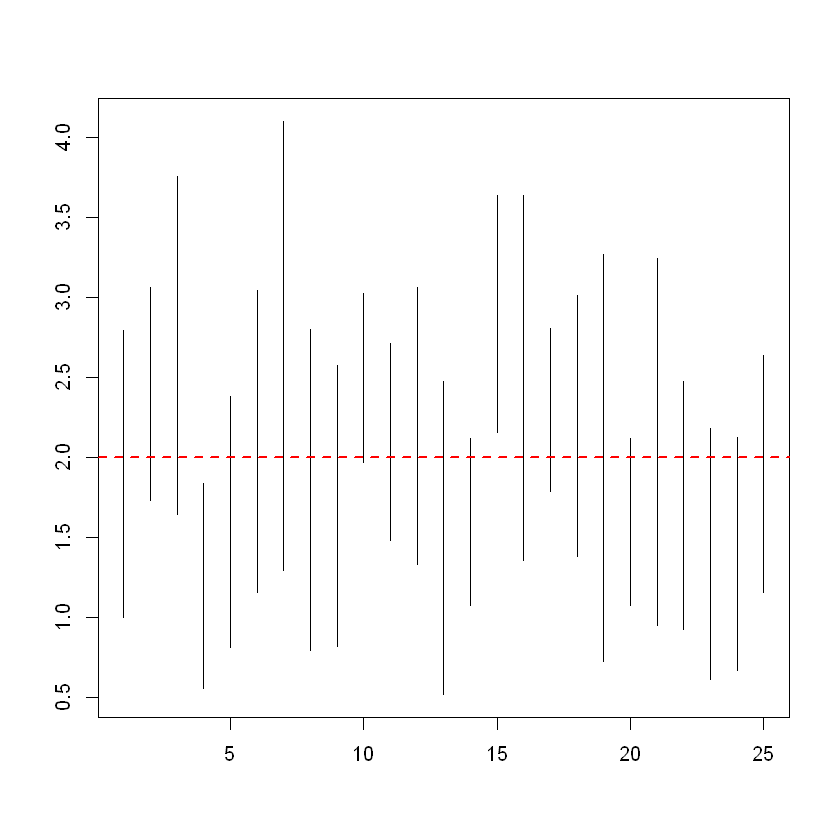

In [9]:
Bounds25 <- Bounds[1:25, ]
plot(1, type="n", xlab="", ylab="", 
     ylim=c(min(Bounds25), max(Bounds25)), xlim=c(1, 25))
segments(x0= 1:25, y0=Bounds25[,1], x1 = 1:25, y1 = Bounds25[,2])
abline(h=2, col = "red", lty = 2, lwd = 2)

*Coverage probability* is the probability that the estimated confidence interval coverage the true value in repeated sampling.
Here the confidence interval is random while the true value is fixed.

It is important to understand that it is not the probability that the parameter falls into a fixed interval, which is the interpretation of the *Bayesian credit interval*. 
The latter requires different way for construction.

### Hypothesis Testing


A *hypothesis* is a statement about the parameter space $\Theta$.
Hypothesis testing checks whether the data support a *null hypothesis*
$\Theta_{0}$, which is a subset of $\Theta$ of interest. Ideally the
null hypothesis should be suggested by scientific theory. The
*alternative hypothesis* $\Theta_{1}=\Theta\backslash\Theta_{0}$ is the
complement of $\Theta_{0}$. Based on the observed evidence, hypothesis
testing decides to accept or reject the null hypothesis. If the null
hypothesis is rejected by the data, it implies that from the statistical
perspective the data is incompatible with the proposed scientific
theory.



------------------------------------------------------------------------
                    |   accept $H_{0}$  |   reject $H_{0}$
      $H_{0}$ true  |  correct decision |    Type I error
      $H_{0}$ false |   Type II error   |  correct decision
------------------------------------------------------------------------

Let $\phi(X;\theta)$ as the *decision function*. It takes value "1" when $\theta$ is rejected as a null hypothesis, and it takes value "0" otherwise.
We define the power function $\beta(\theta) = E[ \phi(X;\theta) ]$, which is the probability of rejecting a null hypothesis $\theta$.

Actions, States and Consequences

-   The *probability of committing Type I error* is
    $\beta\left(\theta\right)$ for some $\theta\in\Theta_{0}$.

-   The *probability of committing Type II error* is
    $1-\beta\left(\theta\right)$ for some $\theta\in\Theta_{1}$.



The philosophy on hypothesis testing has been debated for centuries. At
present the prevailing framework in statistics textbooks is the
*frequentist perspective*. A frequentist views the parameter as a fixed
constant. They keep a conservative attitude about the Type I error: Only
if overwhelming evidence is demonstrated shall a researcher reject the
null. Under the principle of protecting the null hypothesis, a desirable
test should have a small level. Conventionally we take $\alpha=0.01,$
0.05 or 0.1. We say a test is *unbiased* if
$\beta\left(\theta\right)>\sup_{\theta\in\Theta_{0}}\beta\left(\theta\right)$
for all $\theta\in\Theta_{1}$. There can be many tests of correct size.

A trivial test function
$\phi({x})=1\left\{ 0\leq U\leq\alpha\right\}$ for all
$\theta\in\Theta$, where $U$ is a random variable from a uniform
distribution on $\left[0,1\right]$, has correct size $\alpha$ but no
non-trivial power at the alternative. On the other extreme, the trivial
test function $\phi(x)=1$ for all $x$
enjoys the biggest power but suffers incorrect size.

Usually, we design a test by proposing a test statistic
$T_{n}$ and a corresponding critical value
$c_{1-\alpha}$. Given $T_{n}$ and $c_{1-\alpha}$, we write the test
function as
$$
\phi(X)=1\left\{ T_{n} (X)>c_{1-\alpha}\right\}.
$$
To ensure such a $\phi(x)$ has correct size, we need
to figure out the distribution of $T_{n}$ under the null hypothesis
(called the *null distribution*), and choose a critical value
$c_{1-\alpha}$ according to the null distribution and the desirable size
or level $\alpha$.


In [10]:
# set the null hypothesis as 6
(mu-6)/(sigma/sqrt(n))

[1] -0.03099866


Another commonly used indicator in hypothesis testing is $p$-value:
$$\sup_{\theta\in\Theta_{0}}P_{\theta}\left\{ T_{n}\left({x}\right)\leq T_{n}\left({X}\right)\right\} .$$
In the above expression, $T_{n}\left({x}\right)$ is the realized
value of the test statistic $T_{n}$, while
$T_{n}\left({X}\right)$ is the random variable generated by
${X}$ under the null $\theta\in\Theta_{0}$. The interpretation of
the $p$-value is tricky. $p$-value is the probability that we observe
$T_{n}({X})$ being greater than the realized $T_{n}({x})$
if the null hypothesis is true.

$p$-value is *not* the probability that the null hypothesis is true.
Under the frequentist perspective, the null hypothesis is either true or
false, with certainty. The randomness of a test comes only from
sampling, not from the hypothesis. $p$-value measures whether the
dataset is compatible with the null hypothesis. $p$-value is closely
related to the corresponding test. When $p$-value is smaller than the
specified test size $\alpha$, the test rejects the null.


### Connections

Hypothesis testing, confidence interval, and $p$-value are tightly connected. 

### Revealing the population

The population data of HK top 300 Youtubers.

In [11]:
load("logYoutuber.Rdata")
N = nrow(d1.log) # population size

In [12]:
mean(d1.log$count)
cor(d1.log$subs,  d1.log$view)

[1] 6.146389

[1] 0.6336981

In [13]:
subsample.mean <- function(j) { mean( d1.log$count[sample(1:N, n) ] ) }

### Random Sampling

In [14]:
# average of each "potential" sample
rep.mean <- plyr::laply(.data = 1:200,
                        .fun  = subsample.mean )

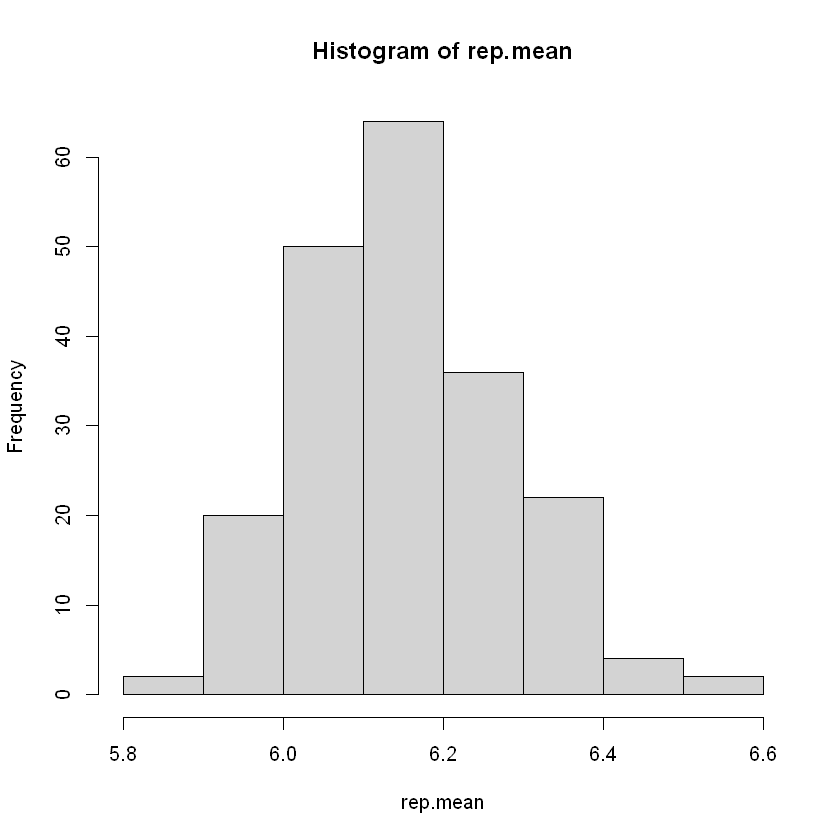

In [15]:
hist(rep.mean)

## Multivaraite Variables

* Covariance 
$$\hat{cov}(X,Y) = \frac{1}{n} \sum_{i=1}^n (X_i - \bar{X}) (Y_i - \bar{Y}) = \frac{1}{n} \sum_{i=1}^n X_i Y_i - bar{X} \bar{Y}.$$
* Correlation coefficient 
$$\hat{\rho}(X,Y ) = \frac{\hat{cov}(X,Y)} { \sqrt{ \hat {\sigma}^2(X) \hat {\sigma}^2(Y) }}$$

[1] 0.63666

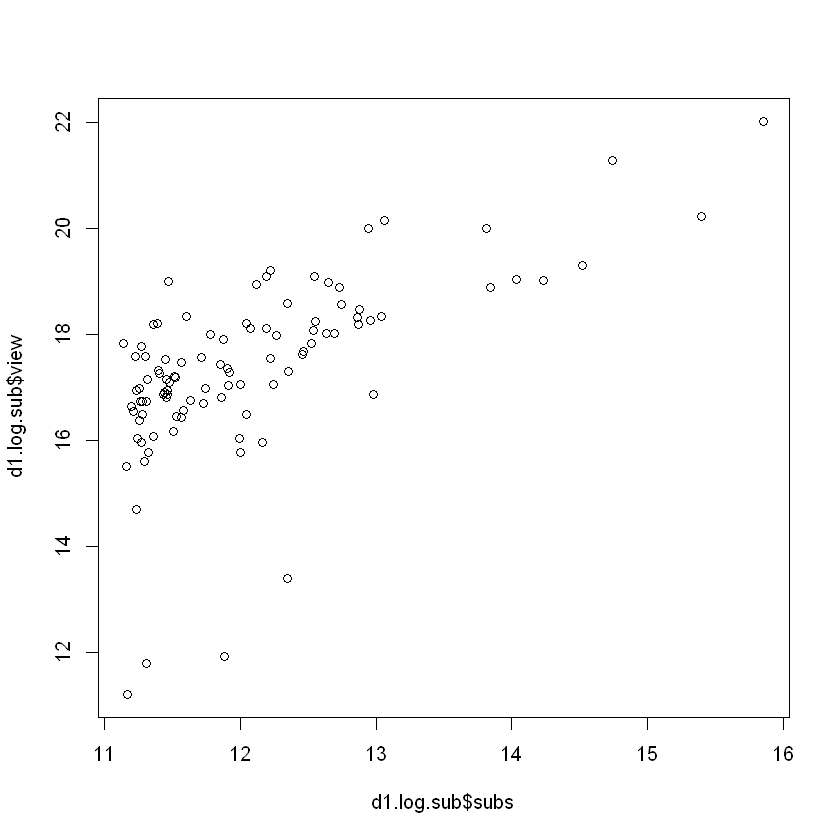

In [16]:
cor(d1.log.sub$subs,  d1.log.sub$view)
plot(x = d1.log.sub$subs,  y = d1.log.sub$view)

In [17]:
cor(d1.log$subs,  d1.log$view)

[1] 0.6336981